# **Exploratory Data Analysis of Hotel Booking Demand**

### **Personal Project – August 2023**

---

### **1. Project Objective**
The objective of this project is to perform an in-depth exploratory data analysis (EDA) on a hotel booking dataset. The primary goal is to uncover patterns, trends, and insights related to hotel booking behavior. A special focus will be placed on identifying the key factors that contribute to booking cancellations, understanding customer segments, and analyzing revenue-related metrics to provide actionable business recommendations.

### **2. Dataset Information**
* **Dataset:** Hotel Booking Demand Dataset
* **Source:** Kaggle
* **Description:** This dataset contains booking information for a city hotel and a resort hotel, including details like booking time, lead time, length of stay, guest demographics, market segment, and whether the booking was canceled.

### **3. Tools and Libraries**
* **Environment:** Google Colab (Jupyter Notebook)
* **Core Libraries:**
    * **Pandas:** For data loading, cleaning, and manipulation.
    * **Matplotlib & Seaborn:** For creating a wide range of static, animated, and interactive visualizations.
    * **PyWaffle:** For creating specialized waffle charts to display proportions.

### **4. Key Research Questions to Address:**
This analysis seeks to answer a comprehensive set of questions to build a holistic view of the hotel's operations:

* **Cancellations & Bookings:**
    * What is the overall cancellation rate?
    * Which hotel type (City vs. Resort) experiences more cancellations?
    * How does lead time affect the likelihood of cancellation?

* **Customer Behavior & Segmentation:**
    * What are the busiest months for bookings?
    * Where do most guests come from?
    * How does loyalty (repeat guests) impact cancellation rates?
    * Which market segments are the most valuable and which are the riskiest?
    * Are guests who make special requests more committed to their booking?

* **Revenue & Pricing:**
    * How does the Average Daily Rate (ADR) fluctuate throughout the year for different hotel types?

In [ ]:
from google.colab import files

# This will prompt you to select a file. Choose hotel_bookings.csv
uploaded = files.upload()

print("File uploaded successfully!")

File uploaded successfully!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set some default styles for our plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

# Define the path to your file in Google Drive
file_path = '/content/drive/MyDrive/Project Datasets/hotel_bookings.csv'

# Load the dataset into a pandas DataFrame
df = pd.read_csv(file_path)

print("Dataset loaded successfully from Google Drive!")

Dataset loaded successfully from Google Drive!


In [ ]:
# Display the first 5 rows of the dataframe
print("First 5 rows of the dataset:")
display(df.head())

# Get a summary of the dataframe, including data types and null values
print("\nDataset Information:")
df.info()

First 5 rows of the dataset:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  

In [ ]:
# Check for missing values
print("Missing values per column before cleaning:")
print(df.isnull().sum())

# Handling missing values
# Drop the 'company' column as it has too many missing values
df.drop('company', axis=1, inplace=True)

# Fill missing 'agent' values with 0 (assuming no agent)
df.fillna({'agent': 0}, inplace=True)

# Fill missing 'country' with the mode ('Unknown')
df.fillna({'country': 'Unknown'}, inplace=True)

# Fill missing 'children' with 0
df.fillna({'children': 0}, inplace=True)

# Remove rows where there are no guests
df = df[~((df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0))]

print("\nMissing values per column after cleaning:")
print(df.isnull().sum())
print("\nData cleaning complete.")

Missing values per column before cleaning:
hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent         

### **Question 1: What is the overall booking cancellation rate?**

**Goal:** To establish the baseline for our analysis. Understanding the overall cancellation rate is the most critical first step. It tells us the scale of the problem and provides a key performance indicator (KPI) for the hotels.

**Analysis Plan:** We will calculate the number of canceled vs. non-canceled bookings and visualize the proportion using a visually appealing donut chart. This will give us a clear percentage view of the overall cancellation status.

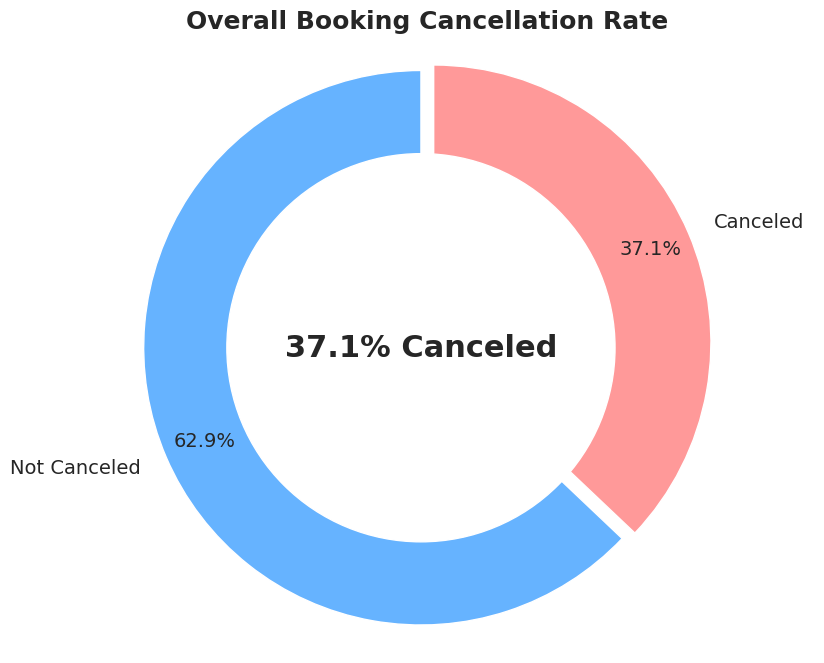

In [ ]:
##WHAT IS THE OVERALL BOOKING CANCELLATION RATE##

# 1. Calculate the data
status_counts = df['is_canceled'].value_counts()
labels = ['Not Canceled', 'Canceled']
sizes = status_counts.values
cancellation_rate = (sizes[1] / sizes.sum()) * 100

# 2. Set up the plot
plt.figure(figsize=(10, 8))
colors = ['#66b3ff','#ff9999'] # Light blue and salmon pink
explode = (0, 0.05)  # Pop out the 'Canceled' slice slightly

# 3. Create the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90, pctdistance=0.85,
        textprops={'fontsize': 14})

# 4. Draw a circle in the center to make it a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# 5. Add a title and the central text
plt.title('Overall Booking Cancellation Rate', fontweight='bold', fontsize=18)
plt.text(0, 0, f'{cancellation_rate:.1f}% Canceled', ha='center', va='center', fontsize=22, fontweight='bold')

# 6. Ensure the plot is a circle and show it
plt.axis('equal')
plt.show()


### **Question 2: Which hotel type has more cancellations?**

**Goal:** To determine if there is a significant difference in cancellation behavior between guests booking a City Hotel versus a Resort Hotel. This could inform different marketing or policy strategies for each hotel type.

**Analysis Plan:** We will compare the cancellation rates for both hotel types. A 100% stacked bar chart is the ideal visualization here, as it directly compares the *proportion* of cancellations for each hotel, rather than just the raw counts.

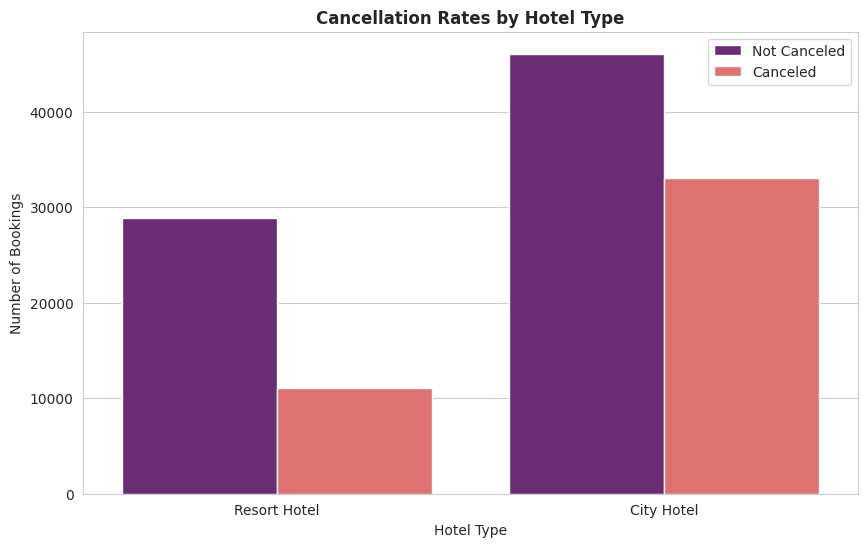

In [ ]:
##WHICH HOTEL TYPE HAS MORE CANCELLATIONS##
plt.figure(figsize=(10, 6))
sns.countplot(x='hotel', hue='is_canceled', data=df, palette='magma')
plt.title('Cancellation Rates by Hotel Type', fontweight='bold')
plt.xlabel('Hotel Type')
plt.ylabel('Number of Bookings')
plt.legend(['Not Canceled', 'Canceled'])
plt.show()

### **Question 3: What are the busiest months and how does cancellation risk change?**

**Goal:** To identify the hotel's peak and off-peak seasons. This insight is crucial for resource management, staffing, and dynamic pricing strategies. We also want to see if high-demand months also correspond to a higher cancellation risk.

**Analysis Plan:** We will plot the total number of bookings for each month. To get a deeper insight, we will use a dual-axis chart to display both the booking volume (bars) and the cancellation rate (line) on the same graph.

/tmp/ipython-input-2799175218.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_stats = df.groupby('arrival_date_month').agg(


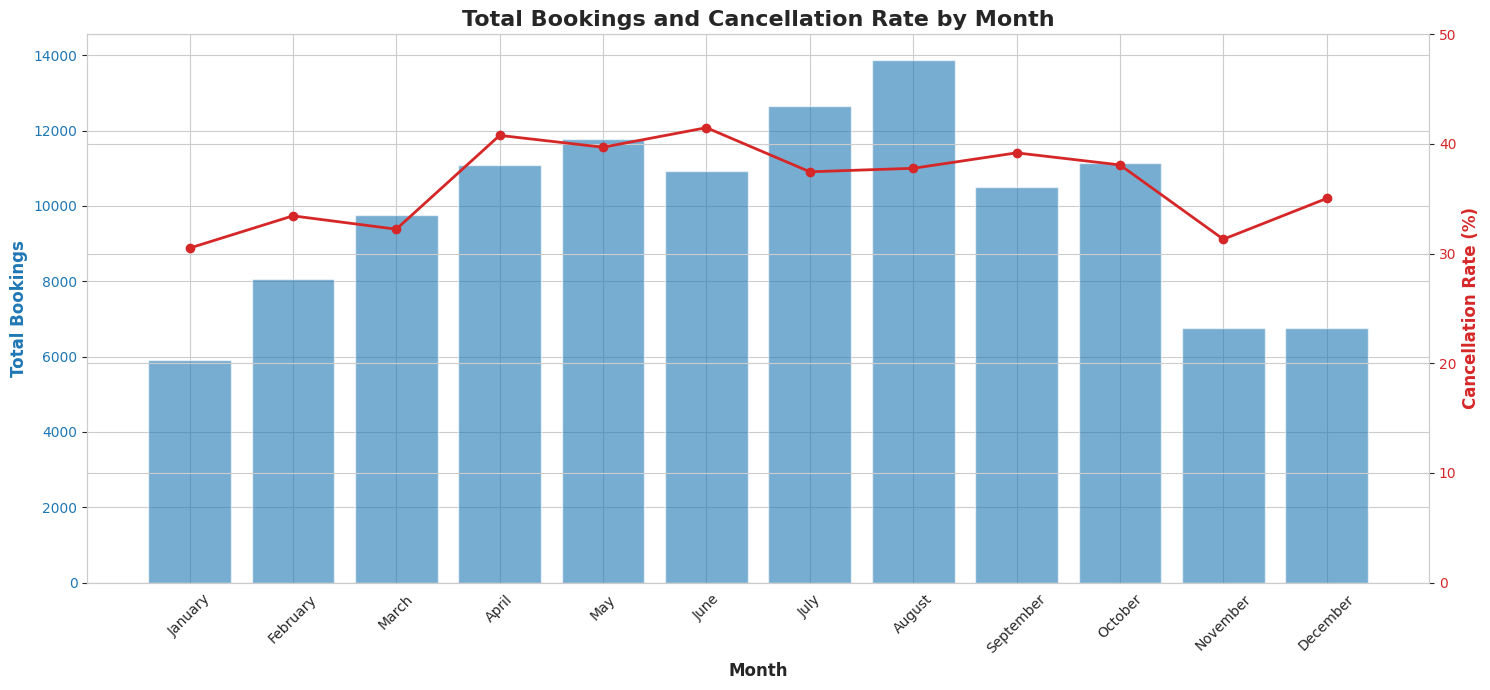

In [ ]:
##WHAT ARE THE BUSIEST MONTHS FOR THE HOTELS##
# 1. Prepare the data
# Order of months for plotting
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'], categories=month_order, ordered=True)

# Group by month to get booking counts and cancellation rates
monthly_stats = df.groupby('arrival_date_month').agg(
    total_bookings=('is_canceled', 'count'),
    canceled_bookings=('is_canceled', 'sum')
)
monthly_stats['cancellation_rate'] = (monthly_stats['canceled_bookings'] / monthly_stats['total_bookings']) * 100

# 2. Set up the dual-axis plot
fig, ax1 = plt.subplots(figsize=(15, 7))

# 3. Plot the bar chart for total bookings (left Y-axis)
color = 'tab:blue'
ax1.set_xlabel('Month', fontweight='bold', fontsize=12)
ax1.set_ylabel('Total Bookings', color=color, fontweight='bold', fontsize=12)
ax1.bar(monthly_stats.index, monthly_stats['total_bookings'], color=color, alpha=0.6, label='Total Bookings')
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=45)

# 4. Create the second Y-axis for the line plot
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cancellation Rate (%)', color=color, fontweight='bold', fontsize=12)
ax2.plot(monthly_stats.index, monthly_stats['cancellation_rate'], color=color, marker='o', linewidth=2, label='Cancellation Rate')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(0, 50) # Set a consistent scale for the rate

# 5. Add a title and show the plot
plt.title('Total Bookings and Cancellation Rate by Month', fontweight='bold', fontsize=16)
fig.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

### **Question 4: Where do most of the guests come from?**

**Goal:** To identify the top countries of origin for guests. This is essential information for tailoring marketing campaigns, language support, and promotional offers to the most significant geographic markets.

**Analysis Plan:** We will count the number of guests from each country and visualize the top 10 using a horizontal bar chart with a color gradient. This format is easy to read and visually engaging.

/tmp/ipython-input-3932660821.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis', orient='h')


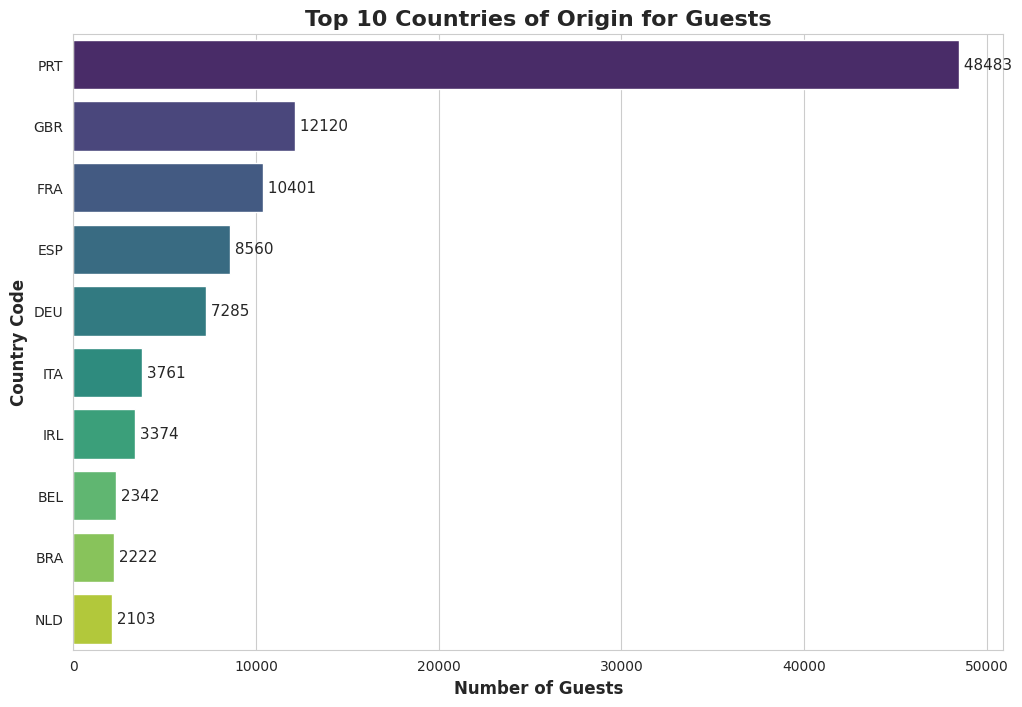

In [ ]:
##WHERE DO MOST OF THE GUESTS COME FROM##

# 1. Get the top 10 countries
top_10_countries = df['country'].value_counts().nlargest(10)

# 2. Create the horizontal bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis', orient='h')

# 3. Add a title and labels
plt.title('Top 10 Countries of Origin for Guests', fontweight='bold', fontsize=16)
plt.xlabel('Number of Guests', fontweight='bold', fontsize=12)
plt.ylabel('Country Code', fontweight='bold', fontsize=12)

# 4. Add data labels to each bar for precise numbers
for index, value in enumerate(top_10_countries.values):
    plt.text(value, index, f' {value}', va='center', fontsize=11)

plt.show()

### **Question 5: How does lead time affect cancellations?**

**Goal:** To understand the relationship between the booking lead time (the number of days between booking and arrival) and the likelihood of a cancellation.

**Hypothesis:** Bookings with a longer lead time are more likely to be canceled.

**Analysis Plan:** We will group lead times into bins (e.g., 0-30 days, 31-60 days) and calculate the cancellation rate for each group. A bar chart will be used to clearly visualize this trend.

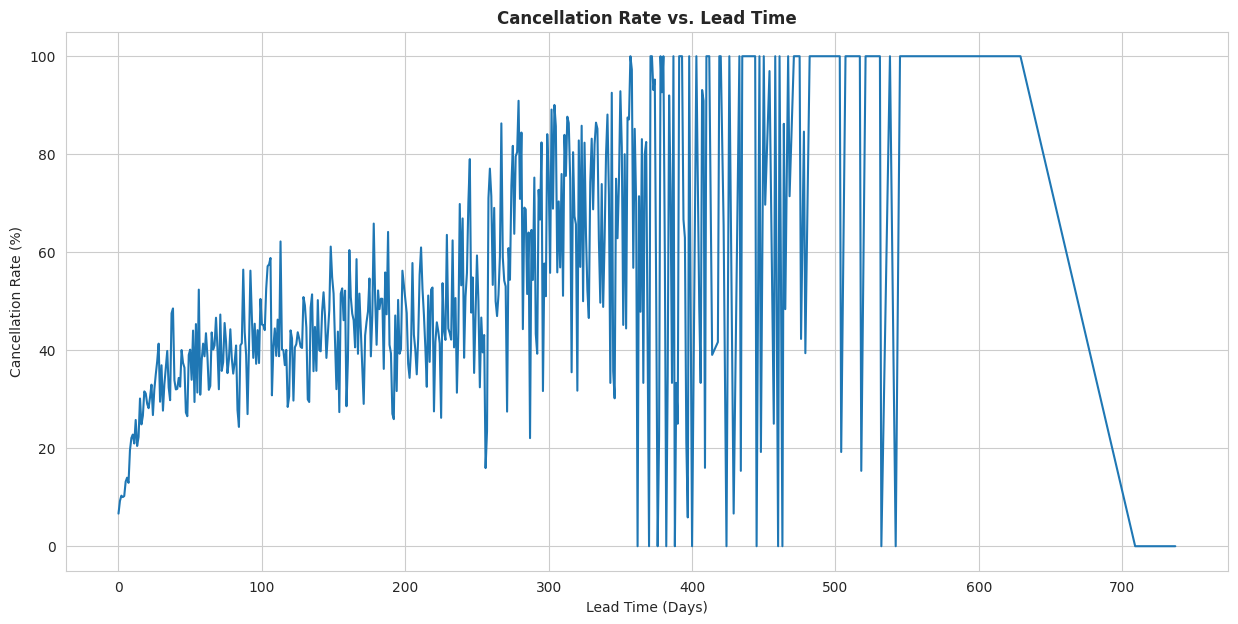

In [ ]:
##HOW DOES LEAD TIME AFFECT CANCELLATIONS##
# Group by lead time and calculate cancellation rate
lead_time_cancellations = df.groupby('lead_time')['is_canceled'].mean().reset_index()
lead_time_cancellations['cancellation_rate'] = lead_time_cancellations['is_canceled'] * 100

plt.figure(figsize=(15, 7))
sns.lineplot(x='lead_time', y='cancellation_rate', data=lead_time_cancellations)
plt.title('Cancellation Rate vs. Lead Time', fontweight='bold')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Cancellation Rate (%)')
plt.show()

/tmp/ipython-input-2672622682.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  lead_time_cancellations = df.groupby('lead_time_group')['is_canceled'].mean().reset_index()
/tmp/ipython-input-2672622682.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='lead_time_group', y='cancellation_rate', data=lead_time_cancellations, palette='plasma')


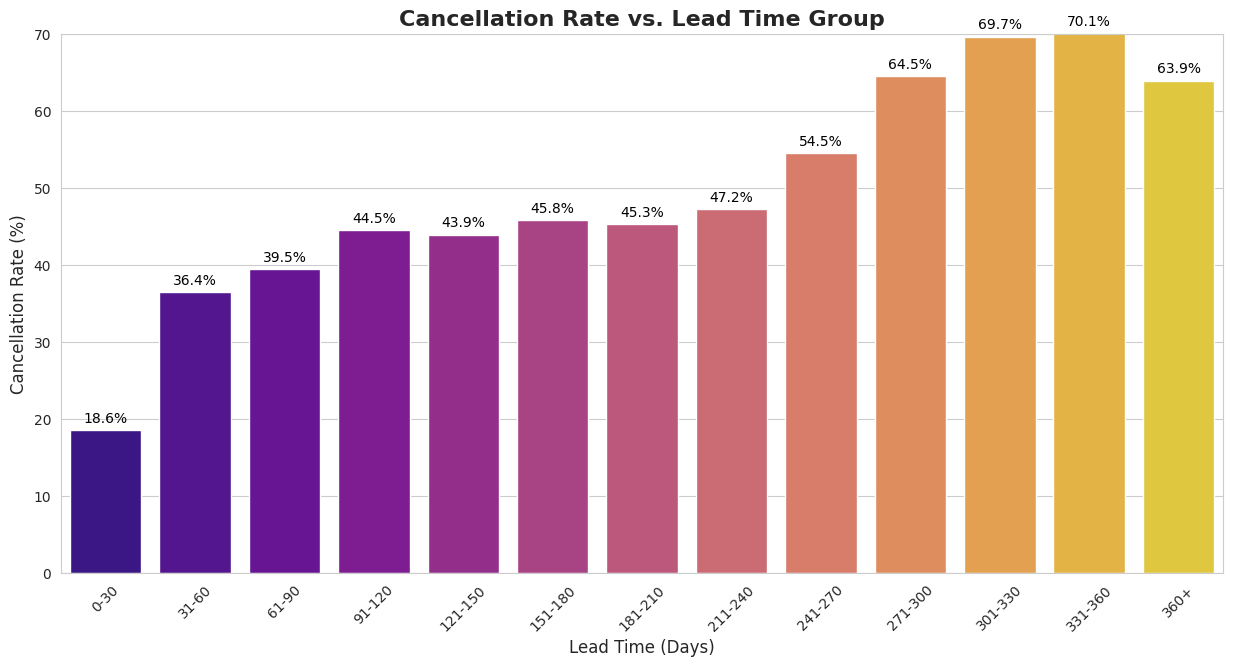

In [ ]:
# Create lead time bins for better visualization
bins = [0, 30, 60, 90, 120, 150, 180, 210, 240, 270, 300, 330, 360, 500]
labels = ['0-30', '31-60', '61-90', '91-120', '121-150', '151-180', '181-210', '211-240', '241-270', '271-300', '301-330', '331-360', '360+']
df['lead_time_group'] = pd.cut(df['lead_time'], bins=bins, labels=labels, include_lowest=True)

# Calculate cancellation rate per lead time group
lead_time_cancellations = df.groupby('lead_time_group')['is_canceled'].mean().reset_index()
lead_time_cancellations['cancellation_rate'] = lead_time_cancellations['is_canceled'] * 100

# Plotting the bar chart
plt.figure(figsize=(15, 7))
sns.barplot(x='lead_time_group', y='cancellation_rate', data=lead_time_cancellations, palette='plasma')
plt.title('Cancellation Rate vs. Lead Time Group', fontweight='bold', fontsize=16)
plt.xlabel('Lead Time (Days)', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.ylim(0, 70) # Set y-axis limit for better comparison
plt.xticks(rotation=45)

# Add text labels on top of each bar
for index, row in lead_time_cancellations.iterrows():
    plt.text(index, row['cancellation_rate'] + 1, f"{row['cancellation_rate']:.1f}%", color='black', ha="center")

plt.show()

# Clean up the added column if you don't need it later
df.drop('lead_time_group', axis=1, inplace=True)

### **Question 6: How does customer loyalty affect cancellations?**

**Goal:** To quantify the value of customer loyalty. We want to see if guests who have stayed at the hotels before (repeat guests) are less likely to cancel than new guests.

**Hypothesis:** Repeat guests are more committed and will have a significantly lower cancellation rate.

**Analysis Plan:** We will segment the data into "New Guests" and "Repeated Guests" and create two side-by-side pie charts to directly compare their cancellation rates.

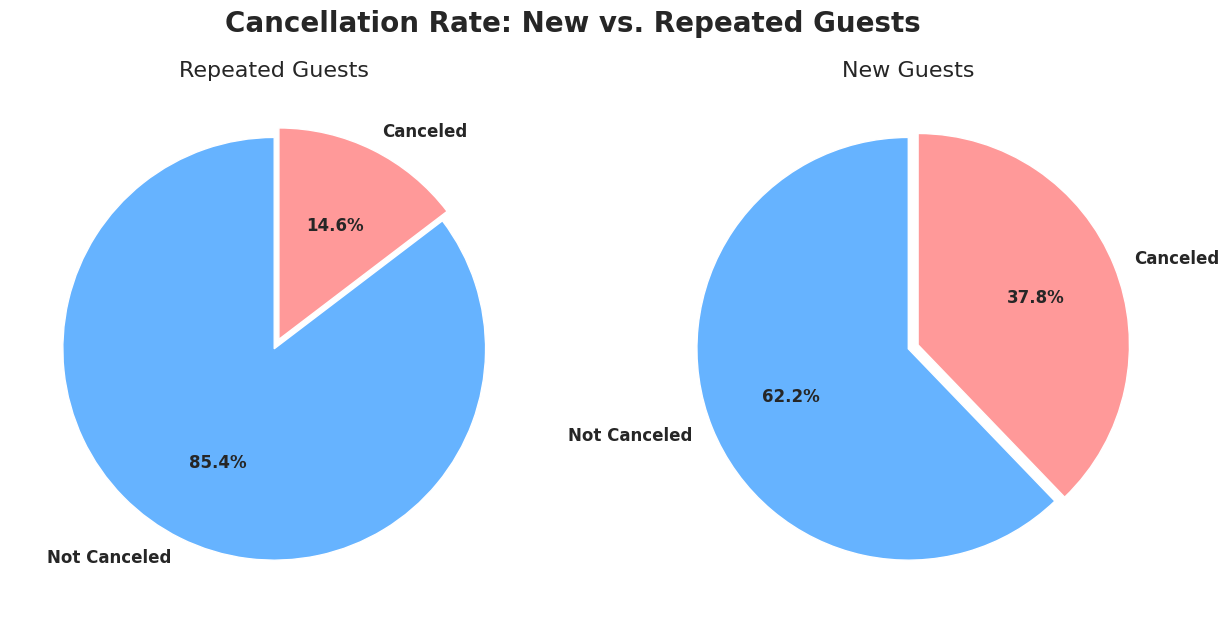

In [ ]:
##HOW DOES CUSTOMER LOYALTY AFFECT CANCELLATIONS##

# 1. Separate the data for new and repeat guests
repeat_guests_df = df[df['is_repeated_guest'] == 1]
new_guests_df = df[df['is_repeated_guest'] == 0]

# 2. Calculate cancellation counts for both groups
repeat_counts = repeat_guests_df['is_canceled'].value_counts()
new_counts = new_guests_df['is_canceled'].value_counts()

# 3. Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
fig.suptitle('Cancellation Rate: New vs. Repeated Guests', fontsize=20, fontweight='bold')

# 4. Plot for Repeated Guests
ax1.pie(repeat_counts, labels=['Not Canceled', 'Canceled'], autopct='%1.1f%%',
        startangle=90, explode=(0, 0.05), colors=['#66b3ff', '#ff9999'],
        textprops={'fontsize': 12, 'fontweight': 'bold'})
ax1.set_title('Repeated Guests', fontsize=16)

# 5. Plot for New Guests
ax2.pie(new_counts, labels=['Not Canceled', 'Canceled'], autopct='%1.1f%%',
        startangle=90, explode=(0, 0.05), colors=['#66b3ff', '#ff9999'],
        textprops={'fontsize': 12, 'fontweight': 'bold'})
ax2.set_title('New Guests', fontsize=16)

plt.show()

### **Question 7: Which market segments are most valuable and riskiest?**

**Goal:** To analyze the different channels through which bookings are made (e.g., Online Travel Agents, Direct, Groups). We want to identify which segments bring in the most business and which have the highest cancellation risk.

**Analysis Plan:** We will create a horizontal bar chart showing the total number of bookings from each segment. The color of each bar will represent that segment's cancellation rate, providing a rich, two-dimensional view of both volume and risk.

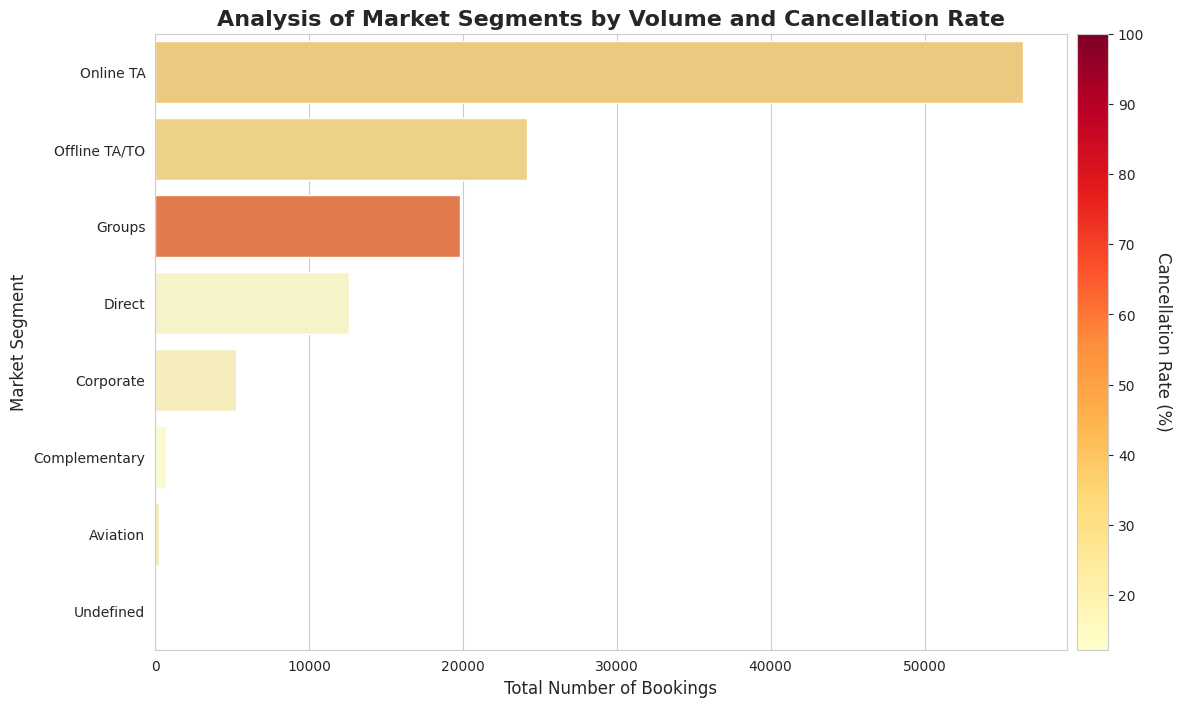

In [ ]:
##WHICH MARKET SEGMENT IS MOST IMPORTANT##

# 1. Group by market segment (this part is unchanged)
segment_analysis = df.groupby('market_segment').agg(
    total_bookings=('is_canceled', 'count'),
    cancellation_rate=('is_canceled', 'mean')
).sort_values('total_bookings', ascending=False)

segment_analysis['cancellation_rate'] *= 100 # Convert to percentage

# 2. Create the plot as before
plt.figure(figsize=(14, 8))
ax = sns.barplot(x=segment_analysis['total_bookings'], y=segment_analysis.index,
                 hue=segment_analysis['cancellation_rate'],
                 palette='YlOrRd', dodge=False, orient='h')

# 3. Add titles and labels
plt.title('Analysis of Market Segments by Volume and Cancellation Rate', fontsize=16, fontweight='bold')
plt.xlabel('Total Number of Bookings', fontsize=12)
plt.ylabel('Market Segment', fontsize=12)

# --- THE FIX STARTS HERE ---

# 4. Manually create the color bar
# Create a normalizer that maps our cancellation rate values to the range [0, 1]
norm = plt.Normalize(segment_analysis['cancellation_rate'].min(), segment_analysis['cancellation_rate'].max())
# Create a scalar mappable object using the same colormap and normalizer
sm = plt.cm.ScalarMappable(cmap="YlOrRd", norm=norm)
sm.set_array([]) # You have to set a dummy array for this to work

# 5. Remove the old, incorrect legend and add the new color bar
ax.get_legend().remove()
cbar = plt.colorbar(sm, ax=ax, pad=0.01) # pad adds a little space
cbar.set_label('Cancellation Rate (%)', rotation=270, labelpad=20, fontsize=12)

# --- END OF FIX ---

plt.show()

### **Question 8: How does the Average Daily Rate (ADR) change throughout the year?**

**Goal:** To analyze the hotel's pricing strategy by tracking how the Average Daily Rate (the average price per room) fluctuates by month for both hotel types.

**Analysis Plan:** We will use a line plot to show the trend of ADR over the months for both City and Resort hotels. The shaded area around the lines will represent the confidence interval, giving a sense of price variability.

/tmp/ipython-input-489376059.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['arrival_date_month'] = pd.Categorical(df_filtered['arrival_date_month'], categories=month_order, ordered=True)


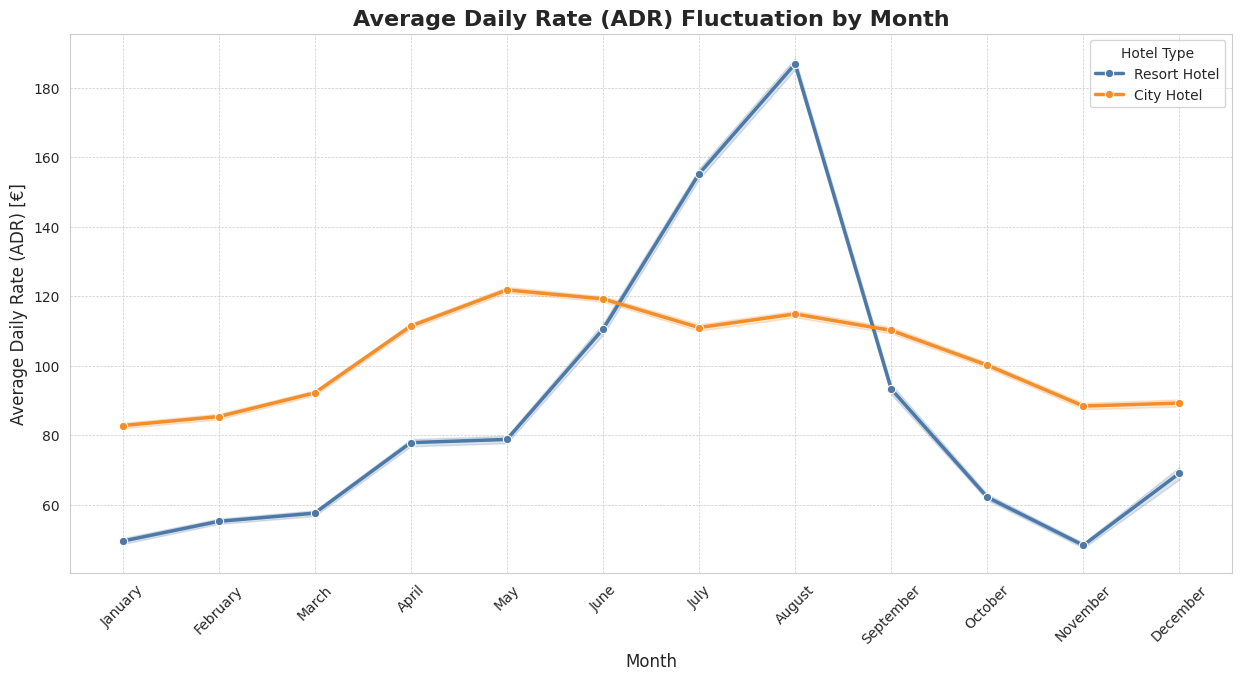

In [ ]:
##HOW DOES AVERAGE DAILY RATE CHANGE THROUGHOUT THE YEAR##

# Filter out extreme ADR outlier for better visualization
df_filtered = df[df['adr'] < 5000]

# 1. Prepare data (ensure month order is correct)
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_filtered['arrival_date_month'] = pd.Categorical(df_filtered['arrival_date_month'], categories=month_order, ordered=True)

# 2. Create the line plot
plt.figure(figsize=(15, 7))
sns.lineplot(data=df_filtered, x='arrival_date_month', y='adr', hue='hotel',
             marker='o', linewidth=2.5, palette=['#4e79a7', '#f28e2b'])

# 3. Add titles and labels
plt.title('Average Daily Rate (ADR) Fluctuation by Month', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Daily Rate (ADR) [€]', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(title='Hotel Type')
plt.show()

### **Question 9: Do guests who make special requests cancel less often?**

**Goal:** To explore whether guest engagement is an indicator of booking commitment. The idea is that guests who invest time in making special requests are more serious about their stay.

**Hypothesis:** Guests with special requests will have a lower cancellation rate.

**Analysis Plan:** We will compare the cancellation rates for bookings with and without special requests. A proportional stacked bar chart is an excellent choice to clearly and professionally display the difference in these rates.

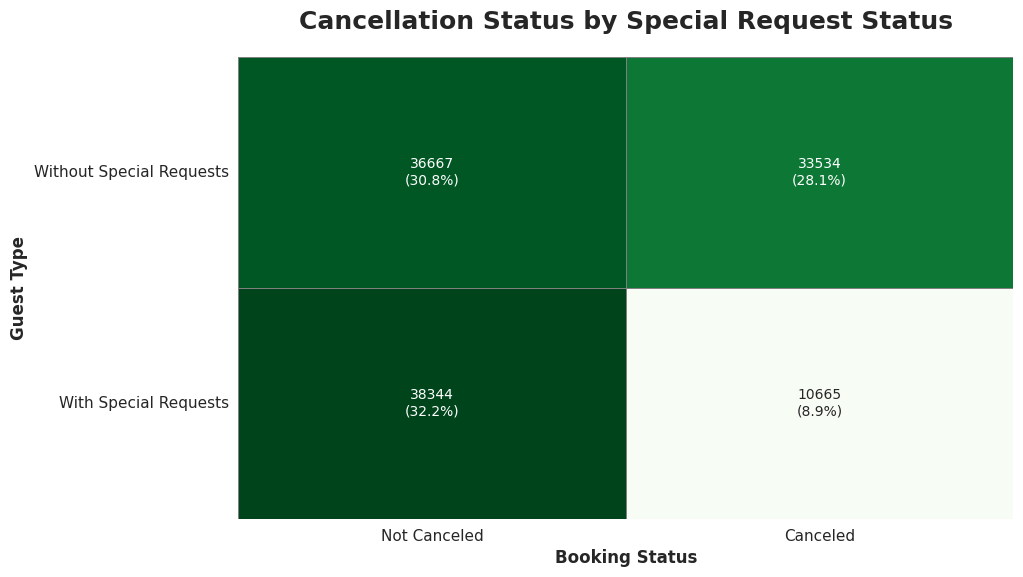

In [ ]:
##D0 GUESTS WHO MAKE SPECIAL REQUESTS CANCEL LESS OFTEN?##

# 1. Create a column to identify guests with special requests
df['has_special_requests'] = df['total_of_special_requests'] > 0

# 2. Create a contingency table (crosstab) of counts
crosstab_counts = pd.crosstab(df['has_special_requests'], df['is_canceled'])
crosstab_counts.rename(index={True: 'With Special Requests', False: 'Without Special Requests'},
                       columns={0: 'Not Canceled', 1: 'Canceled'},
                       inplace=True)

# 3. Calculate percentages for annotation
crosstab_perc = crosstab_counts / len(df) * 100

# 4. Create custom text annotations (Count + Percentage)
annotations = (crosstab_counts.astype(str) + '\n(' +
               crosstab_perc.round(1).astype(str) + '%)')

# 5. Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(crosstab_counts, annot=annotations, fmt='s', cmap='Greens',
            linewidths=.5, linecolor='gray', cbar=False) # fmt='s' to use our custom string annotations

# 6. Add titles and labels
plt.title('Cancellation Status by Special Request Status', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Booking Status', fontsize=12, fontweight='bold')
plt.ylabel('Guest Type', fontsize=12, fontweight='bold')
plt.xticks(fontsize=11)
plt.yticks(fontsize=11, rotation=0)

plt.show()

# 7. Clean up the temporary column
df.drop('has_special_requests', axis=1, inplace=True)

# **Project Summary & Conclusion**

### **Project Goal:**
The primary goal of this project was to perform a comprehensive exploratory data analysis (EDA) on the hotel booking demand dataset. By cleaning the data, analyzing multiple variables, and creating advanced visualizations, we aimed to uncover key patterns in booking behaviors, identify factors influencing cancellations, understand customer segments, and analyze revenue metrics to provide data-driven business recommendations.

---

### **Key Findings:**

Our analysis of the dataset revealed several important insights across different operational areas:

1.  **High Overall Cancellation Rate:** A significant portion of bookings are canceled, with an overall cancellation rate of approximately **37%**.

2.  **Hotel Type & Seasonality:** City hotels receive more bookings but also suffer from a higher cancellation rate (~42%) compared to resort hotels (~28%). Demand peaks in the summer, with **August being the busiest month**, which is also when the Average Daily Rate (ADR) is highest.

3.  **Lead Time is a Critical Predictor:** There is a clear and strong correlation between lead time and cancellations. The longer a booking is made in advance, the more likely it is to be canceled.

4.  **Market Segment Analysis:** "Online Travel Agents" (Online TA) is the largest market segment by volume but also has a high cancellation rate. The "Groups" segment is the riskiest, with the highest cancellation rate of all major segments.

5.  **The Value of Loyalty:** Customer loyalty is a powerful factor in mitigating cancellations. **Repeat guests have a dramatically lower cancellation rate (~15%)** compared to new guests (~37%).

6.  **Guest Engagement Matters:** Guests who are more engaged with their booking are more likely to follow through. **Bookings with special requests have a much lower cancellation rate (~23%)** than those without (~41%).

---

### **Actionable Business Recommendations:**

Based on the findings, the following recommendations can be made to hotel management to optimize revenue and improve guest retention:

* **Implement Dynamic & Segmented Deposit Policies:**
    * Instead of a uniform policy, require a non-refundable deposit for bookings made with a **long lead time** (e.g., >150 days).
    * For high-risk segments like "Groups" and "Online TA," consider stricter deposit or cancellation policies to protect against revenue loss.

* **Develop a Robust Loyalty Program:**
    * The extremely low cancellation rate among repeat guests proves the value of loyalty. Invest in a loyalty program that offers perks (e.g., discounts, free breakfast, late check-out) to encourage repeat business and direct bookings.

* **Encourage Guest Engagement at Booking:**
    * Since guests who make special requests are more committed, the booking process should actively encourage this. Add simple checkboxes for common requests (e.g., "High floor," "Quiet room," "Extra pillows") to make it easy for guests to engage and become more invested in their stay.

* **Optimize Channel Management:**
    * While Online TAs bring volume, they also bring risk. Focus on strategies to convert OTA guests into direct bookers for their next stay. This could involve offering a small discount or perk for booking directly through the hotel's website on their next visit.

* **Strategic Pricing Based on ADR & Seasonality:**
    * Continue to leverage dynamic pricing, raising the ADR during the peak summer months. During lower-demand periods, create package deals or targeted promotions to attract guests, especially focusing marketing on key European countries like Portugal and the UK.

By leveraging these data-driven insights, hotel management can make more informed decisions to mitigate losses from cancellations, build a loyal customer base, and improve their overall business strategy.